# Exploratory analysis and Model building to identify fradulent online transactions and cost to the customer. 



Our customer is an e-commerce site that sells wholesale electronics. You have been contracted to build a model that predicts whether a given transaction is fraudulent or not. You only have information about each user’s first transaction on the company's website. If you fail to identify a fraudulent transaction, the company loses money equivalent to the price of the fraudulently purchased product. Ifyou incorrectly flag a real transaction as fraudulent, it inconveniences the customers
whose valid transactions are flagged—a cost your client values at $8. 

So, the task is to build a model that's predictive but also minimizes to cost to the company not only by correctly flagging and identifying fraudulent transactions but also to minimize the cost of wrong predictions since each wrong prediction costs the company $8.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import time
import os
import gc
import random
from scipy.stats import uniform




##### *Q1*  -- Load the Dataset into a dataframe called transactions


In [3]:
os.chdir('C:\\Users\\rajku\\OneDrive\\Documents\\Training\\Big Data\\Python\\Proff Kemal Oflus\\Final Quiz')
os.listdir()

['.ipynb_checkpoints',
 'Custfile_Predictions D0516.csv',
 'datasetForFinalAssignment.csv',
 'datasetForFinalTest.csv',
 'Notes.PNG',
 'Steps.txt',
 'Testfile_Predictions D0516.csv',
 'Testfile_Predictions.csv',
 'transactions_Rajkumar_Doraiswamy-Models V1.0.ipynb',
 'transactions_Rajkumar_Doraiswamy-Models V2.0.ipynb',
 'transactions_Rajkumar_Doraiswamy-Models V3.0 D0515.ipynb',
 'transactions_Rajkumar_Doraiswamy-Models V4 D0516.ipynb',
 'transactions_Rajkumar_Doraiswamy-Models V5 D0516.ipynb',
 'transactions_Rajkumar_Doraiswamy-Models V6 D0517.ipynb',
 'transactions_Rajkumar_Doraiswamy-Models V7 D0517.ipynb']

Assuming Column 1 is the index from the original table, there are 10 features and a target value "class"; of these 10 features *user_id, device_id, source, browser, sex* are categorical values. Although a numerical value, IP adress is actually a categorical value that represents the user's location. *Age and purchase_value* are continuous variables. 

Interestingly, the dataset also contains information about the user's *signup_time* and *purchase_time*, having done some analysis in the past, the time in between purchase time and signup time has impact on the classification of transaction if its fraudulent or not.

Let's create a new variable *timeBetween* to represent this time period in term sof seconds.

In [4]:
Trans=pd.read_csv("datasetForFinalAssignment.csv")
Test=pd.read_csv("datasetForFinalTest.csv")

Trans.info(), Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74691 entries, 0 to 74690
Data columns (total 14 columns):
Column 1                     74691 non-null int64
user_id                      74691 non-null int64
signup_time                  74691 non-null object
purchase_time                74691 non-null object
signup_time-purchase_time    74691 non-null int64
purchase_value               74691 non-null int64
device_id                    74691 non-null object
source                       74691 non-null object
browser                      74691 non-null object
sex                          74691 non-null object
age                          74691 non-null int64
ip_address                   74691 non-null float64
class                        74691 non-null int64
N[device_id]                 74691 non-null int64
dtypes: float64(1), int64(7), object(6)
memory usage: 8.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13413 entries, 0 to 13412
Data columns (total 13 columns):
Column 1    

(None, None)

In [5]:
Trans.shape, Test.shape

((74691, 14), (13413, 13))

In [6]:
int_cols=Trans.select_dtypes('int64')
int_cols.head()

,Column 1,user_id,signup_time-purchase_time,purchase_value,age,class,N[device_id]
0,149671,285108,82661,31,49,0,2
1,84546,229053,2693,29,34,0,1
2,35978,108439,85995,26,33,0,1
3,103053,178528,151198,35,30,0,1
4,101025,70424,73394,43,40,0,1


In [7]:
feature_cols = ['signup_time-purchase_time', 'purchase_value', 'age', 'N[device_id]']
feature_cols

['signup_time-purchase_time', 'purchase_value', 'age', 'N[device_id]']

In [8]:
X=Trans[feature_cols]
y=Trans['class']
X.shape, y.shape, type(X), type(y)

((74691, 4), (74691,), pandas.core.frame.DataFrame, pandas.core.series.Series)

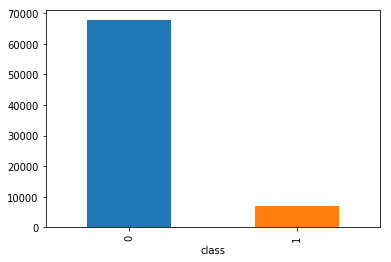

In [9]:
Trans.groupby(['class'])['user_id'].count().plot.bar()

# Split Trans Dataset into Training, Validation/Test.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    shuffle = True,
                                                    random_state=42
                                                    )
X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((56018, 4), (56018,), (18673, 4), (18673,))

# Null Accuracy - Predicting the most Frequent Class

In [12]:
y_test.value_counts()

0    16896
1     1777
Name: class, dtype: int64

In [13]:
y_test.mean()*100## % of 1's

9.51641407379639

In [14]:
(1-y_test.mean())*100 # % of 0's

90.48358592620362

# From Null Accuracy; we can se that dataset 'class' is unbalanced. Let us SMOTE the Training Data 

In [17]:
from imblearn.over_sampling import SMOTE, ADASYN
sm = SMOTE(random_state=1)
X_train_SMT, y_train_SMT = sm.fit_resample(X_train, y_train)

In [18]:
sm.get_params

<bound method BaseEstimator.get_params of SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
   out_step='deprecated', random_state=1, ratio=None,
   sampling_strategy='auto', svm_estimator='deprecated')>

In [19]:
X_train_SMT.shape,y_train_SMT.shape, type(X_train_SMT), type(y_train_SMT)

((101576, 4), (101576,), numpy.ndarray, numpy.ndarray)

# Let us Standardize the Numerical Columns using Standard Scaler.

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [21]:
X_train_Scaled=sc.fit_transform(X_train_SMT)
##X_test_Scaled=sc.fit_transform(X_test_SMT)

C:\Users\rajku\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\rajku\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [26]:
X_train_Scaled.shape, y_train_SMT.shape,type(X_test), X_train.shape, X_test.shape

((101576, 4), (101576,), pandas.core.frame.DataFrame, (56018, 4), (18673, 4))

# Baseline using RandomForestClassifier Model

Import Classfiers from sklearn 

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import auc, roc_curve
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [139]:
RanForCLF = RandomForestClassifier(n_estimators=100, oob_score=False, random_state=0, verbose=1,n_jobs=-1)
RanForCLF.fit(X_train,y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=1, warm_start=False)

In [140]:
RanForCLF_pred = RanForCLF.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [141]:
##Accuracy of model.
(RanForCLF_pred==y_test).sum()/(y_test.size)*100

95.11594280511969

In [142]:
RanForCLF_CM=metrics.confusion_matrix(y_test, RanForCLF_pred)
RanForCLF_Accuracy=metrics.accuracy_score(y_test, RanForCLF_pred)
RanForCLF_Precision= metrics.precision_score(y_test, RanForCLF_pred)
RanForCLF_Recall=metrics.recall_score(y_test, RanForCLF_pred)
RanForCLF_ROC_AOC=metrics.roc_auc_score(y_test, RanForCLF_pred)
RanForCLF_F1=metrics.f1_score(y_test, RanForCLF_pred)
RanForCLF_pred_Prob = RanForCLF.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test,RanForCLF_pred_Prob[: , 1])
RanForCLF_AUC_TPR=np.trapz(tpr,fpr)
RanForCLF_AUC_FPR=np.trapz(fpr,tpr)



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [143]:
print('Confusion Matrix : \n',metrics.confusion_matrix(y_test, RanForCLF_pred))
print('Accuracy :',metrics.accuracy_score(y_test,RanForCLF_pred))
print('Precision Results =', metrics.precision_score(y_test, RanForCLF_pred))
print('Recall Results =', metrics.recall_score(y_test, RanForCLF_pred))
print('ROC_AUC : ', metrics.roc_auc_score(y_test, RanForCLF_pred))
print('F1 Score : ',metrics.f1_score(y_test, RanForCLF_pred))
print('Prediction Prabability :',RanForCLF_pred_Prob)
print('Prediction Prabability Shape :',RanForCLF_pred_Prob.shape)
print('AUC(tpr,fpr) : ', np.trapz(tpr,fpr))
print('AUC(fpr,tpr) : ', np.trapz(fpr,tpr))
RanForCLF.classes_ 


Confusion Matrix : 
 [[16803    93]
 [  819   958]]
Accuracy : 0.9511594280511969
Precision Results = 0.9115128449096099
Recall Results = 0.5391108610016883
ROC_AUC :  0.766803299819026
F1 Score :  0.6775106082036776
Prediction Prabability : [[0.98 0.02]
 [0.88 0.12]
 [1.   0.  ]
 ...
 [0.98 0.02]
 [0.96 0.04]
 [0.77 0.23]]
Prediction Prabability Shape : (18673, 2)
AUC(tpr,fpr) :  0.8195523629744974
AUC(fpr,tpr) :  0.18044763702550262


array([0, 1], dtype=int64)

In [144]:
pd.DataFrame({'Features':feature_cols, 'Feature Importance':RanForCLF.feature_importances_}).sort_values(by = "Feature Importance", ascending=False)

,Features,Feature Importance
0,signup_time-purchase_time,0.625037
3,N[device_id],0.215556
1,purchase_value,0.091422
2,age,0.067985


# Let us Compare Other Classification Models.

SVM Classification Models

In [145]:
svmCLF = SGDClassifier(loss="log",max_iter=1000,n_jobs=-1)

In [146]:
svmCLF.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [147]:
svmCLF_pred = svmCLF.predict(X_test)

In [300]:
svmCLF_CM=metrics.confusion_matrix(y_test,svmCLF_pred )
svmCLF_Accuracy=metrics.accuracy_score(y_test, svmCLF_pred )
svmCLF_Precision= metrics.precision_score(y_test,  svmCLF_pred )
svmCLF_Recall=metrics.recall_score(y_test,  svmCLF_pred )
svmCLF_ROC_AOC=metrics.roc_auc_score(y_test,  svmCLF_pred )
svmCLF_F1=metrics.f1_score(y_test,  svmCLF_pred )
svmCLF_pred_Prob = svmCLF.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test,svmCLF_pred_Prob[: , 1],pos_label= 0)
svmCLF_AUC_TPR=np.trapz(tpr,fpr)
svmCLF_AUC_FPR=np.trapz(fpr,tpr)

In [301]:
print('Confusion Matrix : \n',metrics.confusion_matrix(y_test,svmCLF_pred))

Confusion Matrix : 
 [[16896     0]
 [  838   939]]


Logistic Regression Model With L1 Penalty

In [150]:
LogReg_L1 = LogisticRegression(C=0.1, penalty='l1',n_jobs=-1)
LogReg_L1.fit(X_train,y_train)
LogRegCLFL1_pred_L1 = LogReg_L1.predict(X_test)

C:\Users\rajku\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [151]:
LogRegCLFL1_CM=metrics.confusion_matrix(y_test,LogRegCLFL1_pred_L1 )
LogRegCLFL1_CM_Accuracy=metrics.accuracy_score(y_test, LogRegCLFL1_pred_L1 )
LogRegCLFL1_CM_Precision= metrics.precision_score(y_test,  LogRegCLFL1_pred_L1 )
LogRegCLFL1_CM_Recall=metrics.recall_score(y_test,  LogRegCLFL1_pred_L1 )
LogRegCLFL1_CM_ROC_AOC=metrics.roc_auc_score(y_test,  LogRegCLFL1_pred_L1 )
LogRegCLFL1_CM_F1=metrics.f1_score(y_test,  LogRegCLFL1_pred_L1 )
L1_pred_Prob = LogReg_L1.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test,L1_pred_Prob[: , 1],pos_label= 0)
LogRegCLFL1_AUC_TPR=np.trapz(tpr,fpr)
LogRegCLFL1_AUC_FPR=np.trapz(fpr,tpr)

In [152]:
print('Confusion Matrix : \n',metrics.confusion_matrix(y_test,LogRegCLFL1_pred_L1))

Confusion Matrix : 
 [[16821    75]
 [  853   924]]


Decision Tree Classifier

In [153]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train,y_train)
treeclfpred = treeclf.predict(X_test) 

In [154]:
treeclf_CM=metrics.confusion_matrix(y_test,treeclfpred  )
treeclf_Accuracy=metrics.accuracy_score(y_test, treeclfpred  )
treeclf_Precision= metrics.precision_score(y_test,  treeclfpred  )
treeclf_Recall=metrics.recall_score(y_test,  treeclfpred  )
treeclf_ROC_AOC=metrics.roc_auc_score(y_test,  treeclfpred  )
treeclf_F1=metrics.f1_score(y_test,  treeclfpred  )
treeclf_pred_Prob = treeclf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test,treeclf_pred_Prob[: , 1],pos_label= 0)
treeclf_pred_Prob_AUC_TPR=np.trapz(tpr,fpr)
treeclf_pred_Prob_AUC_FPR=np.trapz(fpr,tpr)

In [155]:
print('Confusion Matrix : \n',metrics.confusion_matrix(y_test,treeclfpred))

Confusion Matrix : 
 [[16896     0]
 [  834   943]]


KNeighbors Classifier

In [308]:
knnclf = KNeighborsClassifier(n_neighbors=1,p=2,metric='minkowski',n_jobs=-1)


In [309]:
knnclf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform')

In [310]:
knn_pred = knnclf.predict(X_test)

In [311]:
knnclf_CM=metrics.confusion_matrix(y_test,knn_pred )
knnclf_Accuracy=metrics.accuracy_score(y_test, knn_pred )
knnclf_Precision= metrics.precision_score(y_test,  knn_pred  )
knnclf_Recall=metrics.recall_score(y_test,  knn_pred  )
knnclf_ROC_AOC=metrics.roc_auc_score(y_test,  knn_pred  )
knnclf_F1=metrics.f1_score(y_test,  knn_pred  )
knnclf_pred_Prob = knnclf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test,knnclf_pred_Prob[: , 1],pos_label= 0)
knnclf_pred_Prob_AUC_TPR=np.trapz(tpr,fpr)
knnclf_pred_Prob_AUC_FPR=np.trapz(fpr,tpr)

In [312]:
print('Confusion Matrix : \n',metrics.confusion_matrix(y_test,knn_pred))

Confusion Matrix : 
 [[16112   784]
 [  790   987]]


# Let us tabularize the metrics for the above classifiers

In [160]:
modelper = {
    "RandomForestClassifier" : pd.Series([RanForCLF_Accuracy,RanForCLF_Precision,RanForCLF_Recall,RanForCLF_ROC_AOC,RanForCLF_F1,RanForCLF_AUC_TPR,RanForCLF_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),
    "SGDClassifier" : pd.Series([svmCLF_Accuracy,svmCLF_Precision,svmCLF_Recall,svmCLF_ROC_AOC,svmCLF_F1,svmCLF_AUC_TPR,svmCLF_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),
    "LogisticsRegL1Classifier" : pd.Series([LogRegCLFL1_CM_Accuracy,LogRegCLFL1_CM_Precision,LogRegCLFL1_CM_Recall,LogRegCLFL1_CM_ROC_AOC,LogRegCLFL1_CM_F1,LogRegCLFL1_AUC_TPR,LogRegCLFL1_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),
    "DecisionTreeClassifier" : pd.Series([treeclf_Accuracy,treeclf_Precision,treeclf_Recall,treeclf_ROC_AOC,treeclf_F1,treeclf_pred_Prob_AUC_TPR,treeclf_pred_Prob_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),
     "KNeighborsClassifier" : pd.Series([treeclf_Accuracy,treeclf_Precision,treeclf_Recall,treeclf_ROC_AOC,treeclf_F1,treeclf_pred_Prob_AUC_TPR,treeclf_pred_Prob_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),   
}
model_perf_matrix_SMT_SCA= pd.DataFrame(modelper).sort_index(ascending=False)
model_perf_matrix_SMT_SCA


,RandomForestClassifier,SGDClassifier,LogisticsRegL1Classifier,DecisionTreeClassifier,KNeighborsClassifier
Recall Score,0.539111,0.528419,0.519977,0.530670,0.530670
ROC_AUC_Score,0.766803,0.764209,0.757769,0.765335,0.765335
Precision Score,0.911513,1.000000,0.924925,1.000000,1.000000
F1_Score,0.677511,0.691458,0.665706,0.693382,0.693382
Accruacy Score,0.951159,0.955122,0.950303,0.955337,0.955337
AUC_TPR,0.819552,0.234398,0.171322,0.171265,0.171265
AUC_FPR,0.180448,0.765602,0.828678,0.828735,0.828735


# What can we arrive at: We are looking at model which precits more Positives which is around True Positives.  
# FalsePositives(normal transactions logged as Possible Fraud) are acceptable than FalseNegatives (Fradulent Transactions accepted as normal)which is optimizing the SENSITIVITY or RECALL score. 

From the above Table ; we can see that KNNClassifier/RandomForestClassifier are the best Performing Model in terms of RECALL, ROC_Score which is more towards SENSITIVITY. 


In [161]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,RanForCLF_pred_Prob[:,1])


Text(0.5, 1.0, 'ROC curve for svmSGDCLF')

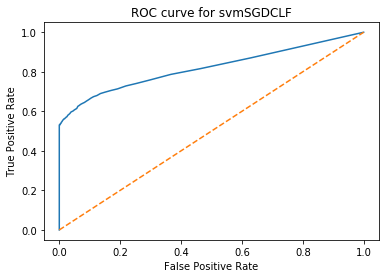

In [162]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], ls="--")
ax.set_xlabel('False Positive Rate') 
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for RanForCLF')

In [163]:
pd.DataFrame({'Features':feature_cols, 'Feature Importance':RanForCLF.feature_importances_}).sort_values(by = "Feature Importance", ascending=False)

,Features,Feature Importance
0,signup_time-purchase_time,0.625037
3,N[device_id],0.215556
1,purchase_value,0.091422
2,age,0.067985


# Let us look at Learning Curve of RandomForestClassifier

In [165]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

In [166]:
train_sizes, train_scores, test_scores =learning_curve(RanForCLF,X=X_train,y=y_train,train_sizes=np.linspace(0.1, 1.0, 10),cv=10,n_jobs=-1,verbose=2)

[learning_curve] Training set sizes: [ 5041 10083 15124 20166 25208 30249 35291 40332 45374 50416]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:  1.3min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished


In [169]:
train_mean =np.mean(train_scores, axis=1)
train_std =np.std(train_scores, axis=1)
test_mean =np.mean(test_scores, axis=1)
test_std =np.std(test_scores, axis=1)

In [170]:
print('train_mean = ',train_mean)
print('train_std = ',train_std )
print('test_mean = ',test_mean)
print('test_std = ', test_std )

train_mean =  [0.99998016 1.         0.99995372 0.99999008 0.99996826 0.99997355
 0.99993199 0.9999281  0.99994049 0.99992661]
train_std =  [5.95120016e-05 0.00000000e+00 3.03000244e-05 2.97530497e-05
 4.27258395e-05 3.56055725e-05 2.59702230e-05 2.33908091e-05
 2.42429585e-05 1.27005797e-05]
test_mean =  [0.95349707 0.95344352 0.95353275 0.95346133 0.95331852 0.95319355
 0.95281868 0.9522296  0.95217605 0.95190831]
test_std =  [0.00181971 0.00180471 0.00193686 0.00198754 0.00224549 0.00206148
 0.00204602 0.00180077 0.00161063 0.00143986]


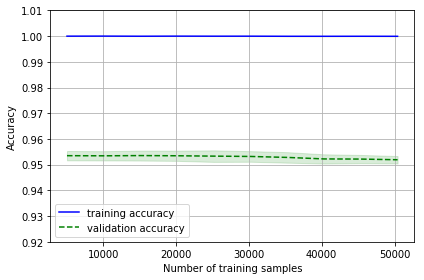

In [173]:
figsize=(12,24)
plt.grid()
plt.ylim([0.92, 1.01])
plt.plot(train_sizes, train_mean,color='blue',label='training accuracy')
plt.fill_between(train_sizes,train_mean + train_std,train_mean - train_std,alpha=0.15, color='yellow')
plt.plot(train_sizes, test_mean,color='green',linestyle='--',label='validation accuracy')
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Let us look at Validation Curve of RanForCLF
Validation curves are a useful tool for improving the performance of a model by addressing issues 
such as overfitting or underfitting. Validation curves are related to learning curves, but instead of plotting the 
training and test accuracies as functions of the sample size, we vary the values of the model parameters, for example, 
the inverse regularization parameter C in logistic regression.

In [174]:
RanForCLF.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [175]:
param_range = np.arange(1, 100, 10)

In [176]:
train_scores, test_scores = validation_curve(RanForCLF,X=X_train,y=y_train,param_name='n_estimators', param_range=param_range,cv=10,n_jobs=-1)

In [177]:
train_sizes.shape,train_scores.shape,test_scores.shape

((10,), (20, 10), (20, 10))

In [178]:
train_mean =np.mean(train_scores, axis=1)
train_std =np.std(train_scores, axis=1)
test_mean =np.mean(test_scores, axis=1)
test_std =np.std(test_scores, axis=1)

In [179]:
print('train_mean = ',train_mean)
print('train_std = ',train_std )
print('test_mean = ',test_mean)
print('test_std = ', test_std )

train_mean =  [0.97041031 0.98524284 0.99392854 0.99342672 0.9968165  0.99654278
 0.99805221 0.99799866 0.99889916 0.99886743 0.99941685 0.99924627
 0.99965487 0.99957752 0.99979372 0.99977587 0.99990281 0.99986512
 0.99994645 0.99992661]
train_std =  [5.11594063e-04 2.67057148e-04 1.72525491e-04 1.44475996e-04
 1.20741536e-04 1.16697167e-04 8.26461709e-05 1.15133898e-04
 9.52294192e-05 8.19939646e-05 5.26261617e-05 5.88417101e-05
 4.08422584e-05 5.54293495e-05 4.87456002e-05 4.16516955e-05
 3.12982767e-05 3.63569944e-05 2.94867067e-05 2.94864976e-05]
test_mean =  [0.91838339 0.94989112 0.94853444 0.95140847 0.95021242 0.95142631
 0.95089077 0.95172978 0.95124779 0.95171194 0.95153343 0.95174763
 0.95151558 0.95156913 0.95139061 0.9518369  0.95155128 0.95189045
 0.9517298  0.95206896]
test_std =  [0.00369166 0.00132092 0.00178055 0.00161425 0.0013608  0.00154735
 0.00183568 0.00162913 0.00175408 0.00154684 0.00158339 0.00162905
 0.00168638 0.00151505 0.00172742 0.00153334 0.00145309 0.

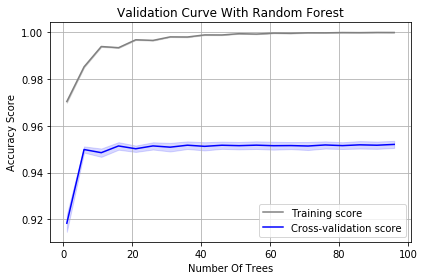

In [180]:
plt.plot(param_range, train_mean, label="Training score", color="gray")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="black",alpha=0.15)
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="blue",alpha=0.15)
plt.grid()
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# Optimization using GridSearchCV

In [181]:
from sklearn.model_selection import GridSearchCV

In [182]:
RanForCLF.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [183]:
parameters = {'n_estimators':   [200,  300],
              'max_features':['auto', 'sqrt', 'log2'],
              'max_depth':      [4,5,6,7,8],
              'criterion' : ['gini', 'entropy']
              }                            

In [184]:
RanForCLFGridCV = GridSearchCV(estimator=RanForCLF, param_grid=parameters, cv= 10,n_jobs=-1, verbose =2,scoring = ['recall', 'roc_auc'],refit = 'roc_auc')

In [185]:
start = time.time()
RanForCLFGridCV.fit(X_train,y_train)
end = time.time()
(end - start)/60

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 34.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.1s finished


34.7454448223114

In [186]:
f"Best score: {RanForCLFGridCV.best_score_} "

'Best score: 0.8269721676668348 '

In [187]:
f"Best parameter set {RanForCLFGridCV.best_params_}"

"Best parameter set {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}"

In [188]:
Y_pred = RanForCLFGridCV.predict(X_test)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [196]:
RanForCLFGridCV_CM=metrics.confusion_matrix(y_test, Y_pred )
RanForCLFGridCV_Accuracy=metrics.accuracy_score(y_test, Y_pred )
RanForCLFGridCV_Precision= metrics.precision_score(y_test,  Y_pred )
RanForCLFGridCV_Recall=metrics.recall_score(y_test,  Y_pred )
RanForCLFGridCV_ROC_AOC=metrics.roc_auc_score(y_test, Y_pred )
RanForCLFGridCV_F1=metrics.f1_score(y_test, Y_pred)
Y_pred_Prob = RanForCLFGridCV.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test,Y_pred_Prob[: , 1],pos_label= 0)
RanForCLFGridCV_AUC_TPR=np.trapz(tpr,fpr)
RanForCLFGridCV_AUC_FPR=np.trapz(fpr,tpr)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [197]:
print('Confusion Matrix : \n',metrics.confusion_matrix(y_test, Y_pred))
print('Accuracy :',metrics.accuracy_score(y_test, Y_pred))
print('Precision Results =', metrics.precision_score(y_test, Y_pred))
print('Recall Results =', metrics.recall_score(y_test, Y_pred))
print('ROC_AUC : ', metrics.roc_auc_score(y_test, Y_pred))
print('F1 Score : ',metrics.f1_score(y_test, Y_pred))
print('AUC(tpr,fpr) : ', np.trapz(tpr,fpr))
print('AUC(fpr,tpr) : ', np.trapz(fpr,tpr))
Y_pred_Prob = RanForCLFGridCV.predict_proba(X_test)
print('Prediction Prabability :',Y_pred_Prob)
print('Prediction Prabability Shape :',Y_pred_Prob.shape)
RanForCLFGridCV.classes_ 

Confusion Matrix : 
 [[16896     0]
 [  834   943]]
Accuracy : 0.9553365822310288
Precision Results = 1.0
Recall Results = 0.5306696679797411
ROC_AUC :  0.7653348339898706
F1 Score :  0.6933823529411764
AUC(tpr,fpr) :  0.1776384690052608
AUC(fpr,tpr) :  0.8223615309947392


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


Prediction Prabability : [[0.9635979  0.0364021 ]
 [0.96423121 0.03576879]
 [0.9670617  0.0329383 ]
 ...
 [0.96669497 0.03330503]
 [0.96476113 0.03523887]
 [0.96443709 0.03556291]]
Prediction Prabability Shape : (18673, 2)


array([0, 1], dtype=int64)

In [198]:
perm = PermutationImportance(
                            RanForCLFGridCV,
                            random_state=1
                            )

In [199]:
start = time.time()
perm.fit(X_test, y_test)
end = time.time()
(end - start)/60

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      |

0.08741180102030437

In [200]:
colnames=X_test.columns.tolist()
colnames

['signup_time-purchase_time', 'purchase_value', 'age', 'N[device_id]']

In [201]:
import eli5
from eli5.sklearn import PermutationImportance

In [202]:
eli5.show_weights(perm,feature_names = colnames)    # X_test.columns.tolist()
                  

Weight,Feature
0.0632 ± 0.0065,N[device_id]
0.0557 ± 0.0071,signup_time-purchase_time
0.0016 ± 0.0034,age
-0.0074 ± 0.0063,purchase_value


In [ ]:
RanForCLFGridCV_CM=metrics.confusion_matrix(y_test, Y_pred )
RanForCLFGridCV_Accuracy=metrics.accuracy_score(y_test, Y_pred )
RanForCLFGridCV_Precision= metrics.precision_score(y_test,  Y_pred )
RanForCLFGridCV_Recall=metrics.recall_score(y_test,  Y_pred )
RanForCLFGridCV_ROC_AOC=metrics.roc_auc_score(y_test, Y_pred )
RanForCLFGridCV_F1=metrics.f1_score(y_test, Y_pred)
Y_pred_Prob = RanForCLFGridCV.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test,Y_pred_Prob[: , 1],pos_label= 0)
RanForCLFGridCV_AUC_TPR=np.trapz(tpr,fpr)
RanForCLFGridCV_AUC_FPR=np.trapz(fpr,tpr)

In [239]:
modelper1 = {
    "RandomForestClassifier" : pd.Series([RanForCLF_Accuracy,RanForCLF_Precision,RanForCLF_Recall,RanForCLF_ROC_AOC,RanForCLF_F1,RanForCLF_AUC_TPR,RanForCLF_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),
    "SGDClassifier" : pd.Series([svmCLF_Accuracy,svmCLF_Precision,svmCLF_Recall,svmCLF_ROC_AOC,svmCLF_F1,svmCLF_AUC_TPR,svmCLF_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),
    "LogisticsRegL1Classifier" : pd.Series([LogRegCLFL1_CM_Accuracy,LogRegCLFL1_CM_Precision,LogRegCLFL1_CM_Recall,LogRegCLFL1_CM_ROC_AOC,LogRegCLFL1_CM_F1,LogRegCLFL1_AUC_TPR,LogRegCLFL1_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),
    "DecisionTreeClassifier" : pd.Series([treeclf_Accuracy,treeclf_Precision,treeclf_Recall,treeclf_ROC_AOC,treeclf_F1,treeclf_pred_Prob_AUC_TPR,treeclf_pred_Prob_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),
     "KNeighborsClassifier" : pd.Series([knnclf_Accuracy,knnclf_Precision,knnclf_Recall,knnclf_ROC_AOC,knnclf_F1,knnclf_pred_Prob_AUC_TPR,knnclf_pred_Prob_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),    
    "RanForCLFGridCV" : pd.Series([RanForCLFGridCV_Accuracy,RanForCLFGridCV_Precision,RanForCLFGridCV_Recall,RanForCLFGridCV_ROC_AOC,RanForCLFGridCV_F1,RanForCLFGridCV_AUC_TPR,RanForCLFGridCV_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),   
}
model_perf_matrix= pd.DataFrame(modelper1).sort_index(ascending=False)
model_perf_matrix

,RandomForestClassifier,SGDClassifier,LogisticsRegL1Classifier,DecisionTreeClassifier,KNeighborsClassifier,RanForCLFGridCV
Recall Score,0.539111,0.528419,0.519977,0.530670,0.555431,0.530670
ROC_AUC_Score,0.766803,0.764209,0.757769,0.765335,0.754514,0.765335
Precision Score,0.911513,1.000000,0.924925,1.000000,0.557312,1.000000
F1_Score,0.677511,0.691458,0.665706,0.693382,0.556370,0.693382
Accruacy Score,0.951159,0.955122,0.950303,0.955337,0.915707,0.955337
AUC_TPR,0.819552,0.234398,0.171322,0.171265,0.245486,0.177638
AUC_FPR,0.180448,0.765602,0.828678,0.828735,0.754514,0.822362


In [248]:
knnclf.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [255]:
knn_param = {'n_neighbors':   [3,5,7,9],
              'weights':['uniform'],
              'metric': ['euclidean']
            }                            

In [256]:
knnclfGridCV = GridSearchCV(estimator=knnclf, param_grid=knn_param, cv= 10,n_jobs=-1, verbose =2,scoring = ['recall', 'roc_auc'],refit = 'roc_auc')

In [257]:
start = time.time()
knnclfGridCV.fit(X_train,y_train)
end = time.time()
(end - start)/60

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   17.3s finished


0.2923770745595296

In [285]:

knnclfGridCV_CM=metrics.confusion_matrix(y_test, Y_pred )
knnclfGridCV_Accuracy=metrics.accuracy_score(y_test, Y_pred )
knnclfGridCV_Precision= metrics.precision_score(y_test,  Y_pred )
knnclfGridCV_Recall=metrics.recall_score(y_test,  Y_pred )
knnclfGridCV=metrics.roc_auc_score(y_test, Y_pred )
knnclfGridCV_F1=metrics.f1_score(y_test, Y_pred)
Y_pred_Prob = RanForCLFGridCV.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test,Y_pred_Prob[: , 1],pos_label= 0)
knnclfGridCV_AUC_TPR=np.trapz(tpr,fpr)
knnclfGridCV_AUC_FPR=np.trapz(fpr,tpr)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [286]:
modelper1 = {
    "RandomForestClassifier" : pd.Series([RanForCLF_Accuracy,RanForCLF_Precision,RanForCLF_Recall,RanForCLF_ROC_AOC,RanForCLF_F1,RanForCLF_AUC_TPR,RanForCLF_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),
    "SGDClassifier" : pd.Series([svmCLF_Accuracy,svmCLF_Precision,svmCLF_Recall,svmCLF_ROC_AOC,svmCLF_F1,svmCLF_AUC_TPR,svmCLF_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),
    "LogisticsRegL1Classifier" : pd.Series([LogRegCLFL1_CM_Accuracy,LogRegCLFL1_CM_Precision,LogRegCLFL1_CM_Recall,LogRegCLFL1_CM_ROC_AOC,LogRegCLFL1_CM_F1,LogRegCLFL1_AUC_TPR,LogRegCLFL1_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),
    "DecisionTreeClassifier" : pd.Series([treeclf_Accuracy,treeclf_Precision,treeclf_Recall,treeclf_ROC_AOC,treeclf_F1,treeclf_pred_Prob_AUC_TPR,treeclf_pred_Prob_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),
     "KNeighborsClassifier" : pd.Series([knnclf_Accuracy,knnclf_Precision,knnclf_Recall,knnclf_ROC_AOC,knnclf_F1,knnclf_pred_Prob_AUC_TPR,knnclf_pred_Prob_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),    
    "RanForCLFGridCV" : pd.Series([RanForCLFGridCV_Accuracy,RanForCLFGridCV_Precision,RanForCLFGridCV_Recall,RanForCLFGridCV_ROC_AOC,RanForCLFGridCV_F1,RanForCLFGridCV_AUC_TPR,RanForCLFGridCV_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),   
    "knnclfGridCV" : pd.Series([knnclfGridCV_Accuracy,knnclfGridCV_Precision,knnclfGridCV_Recall,knnclfGridCV_ROC_AOC,knnclfGridCV_F1,knnclfGridCV_AUC_TPR,knnclfGridCV_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),   

}
model_perf_matrix= pd.DataFrame(modelper1).sort_index(ascending=False)
model_perf_matrix

,RandomForestClassifier,SGDClassifier,LogisticsRegL1Classifier,DecisionTreeClassifier,KNeighborsClassifier,RanForCLFGridCV,knnclfGridCV
Recall Score,0.539111,0.528419,0.519977,0.530670,0.555431,0.530670,0.530670
ROC_AUC_Score,0.766803,0.764209,0.757769,0.765335,0.754514,0.765335,0.765335
Precision Score,0.911513,1.000000,0.924925,1.000000,0.557312,1.000000,1.000000
F1_Score,0.677511,0.691458,0.665706,0.693382,0.556370,0.693382,0.693382
Accruacy Score,0.951159,0.955122,0.950303,0.955337,0.915707,0.955337,0.955337
AUC_TPR,0.819552,0.234398,0.171322,0.171265,0.245486,0.177638,0.177638
AUC_FPR,0.180448,0.765602,0.828678,0.828735,0.754514,0.822362,0.822362


# Let us look at VotingClassifier to determine what is the best. 

In [287]:
from sklearn.ensemble import VotingClassifier

In [288]:
VotCLF = VotingClassifier(estimators=[('RandomForestClassifier', RanForCLF), ('SGDClassifier', svmCLF), ('LogisticsRegL1Classifier', LogReg_L1), ('DecisionTreeClassifier', treeclf),('KNeighborsClassifier', knnclf)], voting='soft')

In [289]:
VotCLF.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.4s finished
C:\Users\rajku\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1297: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


VotingClassifier(estimators=[('RandomForestClassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2...wski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [290]:
Vot_Pred=VotCLF.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [291]:
##Accuracy of model.
(Vot_Pred==y_test).sum()/(y_test.size)*100

95.53365822310288

In [292]:
VotCLF_CM=metrics.confusion_matrix(y_test, Y_pred )
VotCLF_Accuracy=metrics.accuracy_score(y_test, Y_pred )
VotCLF_Precision= metrics.precision_score(y_test,  Y_pred )
VotCLF_Recall=metrics.recall_score(y_test,  Y_pred )
VotCLF_ROC_AOC=metrics.roc_auc_score(y_test, Y_pred )
VotCLF_F1=metrics.f1_score(y_test, Y_pred)
VotCLF_pred_Prob = VotCLF.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test,VotCLF_pred_Prob[: , 1],pos_label= 0)
VotCLF_pred_Prob_AUC_TPR=np.trapz(tpr,fpr)
VotCLF_pred_Prob_AUC_FPR=np.trapz(fpr,tpr)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [293]:
fpr, tpr, thresholds = roc_curve(y_test,
                                 VotCLF_pred_Prob[: , 1],
                                 pos_label= 0
                                 )

In [294]:
print('Confusion Matrix : \n',metrics.confusion_matrix(y_test, Vot_Pred))
print('Accuracy :',metrics.accuracy_score(y_test, Vot_Pred))
print('Precision Results =', metrics.precision_score(y_test, Vot_Pred))
print('Recall Results =', metrics.recall_score(y_test, Vot_Pred))
print('ROC_AUC : ', metrics.roc_auc_score(y_test, Vot_Pred))
print('F1 Score : ',metrics.f1_score(y_test, Vot_Pred))
Vot_pred_Prob = VotCLF.predict_proba(X_test)
print('AUC(tpr,fpr) : ', np.trapz(tpr,fpr))
print('AUC(fpr,tpr) : ', np.trapz(fpr,tpr))
print('Prediction Prabability :',Vot_pred_Prob)
print('Prediction Prabability Shape :',Vot_pred_Prob.shape)
VotCLF.classes_ 

Confusion Matrix : 
 [[16896     0]
 [  834   943]]
Accuracy : 0.9553365822310288
Precision Results = 1.0
Recall Results = 0.5306696679797411
ROC_AUC :  0.7653348339898706
F1 Score :  0.6933823529411764


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


AUC(tpr,fpr) :  0.17975591149963335
AUC(fpr,tpr) :  0.8202440885003667
Prediction Prabability : [[0.98231561 0.01768439]
 [0.95865015 0.04134985]
 [0.98155027 0.01844973]
 ...
 [0.97745847 0.02254153]
 [0.97583289 0.02416711]
 [0.94020343 0.05979657]]
Prediction Prabability Shape : (18673, 2)


array([0, 1], dtype=int64)

In [295]:
model_perf_matrix2.shape

(7, 7)

In [296]:
modelper3 = {
    "RandomForestClassifier" : pd.Series([RanForCLF_Accuracy,RanForCLF_Precision,RanForCLF_Recall,RanForCLF_ROC_AOC,RanForCLF_F1,RanForCLF_AUC_TPR,RanForCLF_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),
    "SGDClassifier" : pd.Series([svmCLF_Accuracy,svmCLF_Precision,svmCLF_Recall,svmCLF_ROC_AOC,svmCLF_F1,svmCLF_AUC_TPR,svmCLF_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),
    "LogisticsRegL1Classifier" : pd.Series([LogRegCLFL1_CM_Accuracy,LogRegCLFL1_CM_Precision,LogRegCLFL1_CM_Recall,LogRegCLFL1_CM_ROC_AOC,LogRegCLFL1_CM_F1,LogRegCLFL1_AUC_TPR,LogRegCLFL1_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),
    "DecisionTreeClassifier" : pd.Series([treeclf_Accuracy,treeclf_Precision,treeclf_Recall,treeclf_ROC_AOC,treeclf_F1,treeclf_pred_Prob_AUC_TPR,treeclf_pred_Prob_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),
     "KNeighborsClassifier" : pd.Series([knnclf_Accuracy,knnclf_Precision,knnclf_Recall,knnclf_ROC_AOC,knnclf_F1,knnclf_pred_Prob_AUC_TPR,knnclf_pred_Prob_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),   
    "RanForCLFGridCV" : pd.Series([RanForCLFGridCV_Accuracy,RanForCLFGridCV_Precision,RanForCLFGridCV_Recall,RanForCLFGridCV_ROC_AOC,RanForCLFGridCV_F1,RanForCLFGridCV_AUC_TPR,RanForCLFGridCV_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),   
    "knnclfGridCV" : pd.Series([knnclfGridCV_Accuracy,knnclfGridCV_Precision,knnclfGridCV_Recall,knnclfGridCV_ROC_AOC,knnclfGridCV_F1,knnclfGridCV_AUC_TPR,knnclfGridCV_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"]),   
    "VotingCLF" : pd.Series([VotCLF_Accuracy,VotCLF_Precision,VotCLF_Recall,VotCLF_ROC_AOC,VotCLF_F1,VotCLF_pred_Prob_AUC_TPR,VotCLF_pred_Prob_AUC_FPR],index=["Accruacy Score","Precision Score","Recall Score","ROC_AUC_Score","F1_Score","AUC_TPR","AUC_FPR"])
}
model_perf_matrix3= pd.DataFrame(modelper3).sort_index(ascending=False)
model_perf_matrix3

,RandomForestClassifier,SGDClassifier,LogisticsRegL1Classifier,DecisionTreeClassifier,KNeighborsClassifier,RanForCLFGridCV,knnclfGridCV,VotingCLF
Recall Score,0.539111,0.528419,0.519977,0.530670,0.555431,0.530670,0.530670,0.530670
ROC_AUC_Score,0.766803,0.764209,0.757769,0.765335,0.754514,0.765335,0.765335,0.765335
Precision Score,0.911513,1.000000,0.924925,1.000000,0.557312,1.000000,1.000000,1.000000
F1_Score,0.677511,0.691458,0.665706,0.693382,0.556370,0.693382,0.693382,0.693382
Accruacy Score,0.951159,0.955122,0.950303,0.955337,0.915707,0.955337,0.955337,0.955337
AUC_TPR,0.819552,0.234398,0.171322,0.171265,0.245486,0.177638,0.177638,0.179756
AUC_FPR,0.180448,0.765602,0.828678,0.828735,0.754514,0.822362,0.822362,0.820244


In [302]:
print("Voting Claassifier Confusion Matrix: \n")
display(VotCLF_CM)
print("RanForCLFGridCV Claassifier Confusion Matrix: \n")
display(RanForCLFGridCV_CM)
print("KNeighborsGridCV Claassifier Confusion Matrix: \n")
display(knnclfGridCV_CM)
print("RanForest Claassifier Confusion Matrix: \n")
display(RanForCLF_CM)
print("LogisticsReg Claassifier Confusion Matrix: \n")
display(LogRegCLFL1_CM)
print("DecisionTree Claassifier Confusion Matrix: \n")
display(treeclf_CM)
print("KNeighbors Claassifier Confusion Matrix: \n")
display(knnclf_CM)
print("SGD Claassifier Confusion Matrix: \n")
display(svmCLF_CM)

Voting Claassifier Confusion Matrix: 



array([[16896,     0],
       [  834,   943]], dtype=int64)

RanForCLFGridCV Claassifier Confusion Matrix: 



array([[16896,     0],
       [  834,   943]], dtype=int64)

KNeighborsGridCV Claassifier Confusion Matrix: 



array([[16896,     0],
       [  834,   943]], dtype=int64)

RanForest Claassifier Confusion Matrix: 



array([[16803,    93],
       [  819,   958]], dtype=int64)

LogisticsReg Claassifier Confusion Matrix: 



array([[16821,    75],
       [  853,   924]], dtype=int64)

DecisionTree Claassifier Confusion Matrix: 



array([[16896,     0],
       [  834,   943]], dtype=int64)

KNeighbors Claassifier Confusion Matrix: 



array([[16112,   784],
       [  790,   987]], dtype=int64)

SGD Claassifier Confusion Matrix: 



array([[16896,     0],
       [  838,   939]], dtype=int64)

# Conclusion :
# Our Models intent is to identify most of the Fradulent Transactions. Looking at all the models providied ; KNN Classifier was able to 
# classify most number of fradulent transactions and also least number of transactions that misclassified as fraud to normal tranactions. 
# We will use KNN Classifier for our Test File and also Cost to Customer.

# Test Dataset Predictions. 

In [620]:
feature_cols = ['signup_time-purchase_time', 'purchase_value', 'age', 'N[device_id]']
X1=Test[feature_cols]
X1.shape,type(X)
XTest=Test

In [621]:
XTest.shape

(13413, 13)

In [622]:
X1_Pred=knnclf.predict(X1)

In [623]:
X1_Pred.shape

(13413,)

In [624]:
Test_Pred=pd.DataFrame(X1_Pred,columns=['Predicted class'])

In [625]:
type(Test_Pred)

pandas.core.frame.DataFrame

In [626]:
type(X1)

pandas.core.frame.DataFrame

In [627]:
##df = pd.DataFrame(data,index=data[:,0]),
Test_Predictions=pd.concat([XTest,Test_Pred],axis=1)

In [628]:
Test_Predictions.shape

(13413, 14)

In [629]:
Test_Predictions.to_csv("Submission_Rajkumar_Doraiswamy.csv")

# Let us look at the Cost to the Customer

In [638]:
X_test.shape, y_test.shape, Cust_Pred.shape

((18673, 4), (18673,), (18673,))

In [631]:
Cust_Pred=knnclf.predict(X_test)

In [632]:
type(Cust_Pred), type(y_test), type(X_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [634]:
Cust_Pred_Class.shape, Act_test_Class.shape, Data_X_test.shape

((18673, 1), (18673, 1), (18673, 4))

In [635]:
Cust_Pred_Class=pd.DataFrame(Cust_Pred,columns=['Predicted class by Model'])

In [636]:
Act_test_Class=pd.DataFrame(y_test,columns=['class'])

In [637]:
Data_X_test=pd.DataFrame(X_test,columns=['signup_time-purchase_time', 'purchase_value', 'age', 'N[device_id]'])

In [633]:
type(Cust_Pred_Class), type(Act_test_Class), type(Data_X_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [639]:
Cust_Predict=pd.concat([Data_X_test,Act_test_Class,Cust_Pred_Class],axis=1)

In [640]:
type(Cust_Predict), Cust_Predict.shape

(pandas.core.frame.DataFrame, (18673, 6))

In [641]:
Cust_Predict.tail()

,signup_time-purchase_time,purchase_value,age,N[device_id],class,Predicted class by Model
18668,116284,50,31,1,0,0
18669,32049,18,22,1,0,0
18670,14539,45,21,1,0,0
18671,77542,16,31,1,0,0
18672,165499,34,19,1,0,0


In [642]:
Cust_Predict["Predicted class by Model"].isnull().sum()

0

In [643]:
np.sum(Cust_Predict.isnull()).sort_values(ascending = False)

Predicted class by Model     0
class                        0
N[device_id]                 0
age                          0
purchase_value               0
signup_time-purchase_time    0
dtype: int64

Let us extract all Data. Cost to the customer is $8* wrongFraudulent + purchase value of all frauds that missed

Fradulent Transactions are our Positive Class 1. Normal Transaction is our Negative Class 0. 
False Negatives is where the transactions are normal but our Model predicted as Fradulent. This will result in temporary lost sale.We take the total number of transactions and multiple by $8. 
False Positives is where the transactions are Fradulent but our Model predcited as Normal which is a LOSS to the customers. We add all the Purchase Value of these Transactions. 

In [644]:
FalseNegatives=Cust_Predict[( Cust_Predict["class"]==0) & (Cust_Predict["Predicted class by Model"]==1)]

In [647]:
FalseNegatives.tail()

,signup_time-purchase_time,purchase_value,age,N[device_id],class,Predicted class by Model
18531,14296,61,52,1,0,1
18582,90623,24,33,1,0,1
18626,130620,11,21,1,0,1
18637,99078,46,33,1,0,1
18651,142181,28,36,1,0,1


In [645]:
FalsePositives=Cust_Predict[( Cust_Predict["class"]==1) & (Cust_Predict["Predicted class by Model"]==0)]

In [646]:
FalsePositives.head()

,signup_time-purchase_time,purchase_value,age,N[device_id],class,Predicted class by Model
47,105948,38,26,1,1,0
56,105813,18,29,1,1,0
73,162440,89,35,1,1,0
142,106829,45,42,1,1,0
168,62606,17,21,2,1,0


Now let us take our Best Model that gave us a best RECALL to calculate the cost and verify the transactions. 

In [649]:
knnclf_CM

array([[16112,   784],
       [  790,   987]], dtype=int64)

In [650]:
FalseNegatives.info(), FalsePositives.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 20 to 18651
Data columns (total 6 columns):
signup_time-purchase_time    784 non-null int64
purchase_value               784 non-null int64
age                          784 non-null int64
N[device_id]                 784 non-null int64
class                        784 non-null int64
Predicted class by Model     784 non-null int64
dtypes: int64(6)
memory usage: 42.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 790 entries, 47 to 18656
Data columns (total 6 columns):
signup_time-purchase_time    790 non-null int64
purchase_value               790 non-null int64
age                          790 non-null int64
N[device_id]                 790 non-null int64
class                        790 non-null int64
Predicted class by Model     790 non-null int64
dtypes: int64(6)
memory usage: 43.2 KB


(None, None)

In [651]:
print('Total number of FalsePositives : ', len(FalsePositives.index))
print('CostOfFalsePositive=           : $', len(FalsePositives.index)*8)


Total number of FalsePositives :  790
CostOfFalsePositive=           : $ 6320


In [652]:
print('Total number of FalseNegatives : ', len(FalseNegatives.index))
print('CostOfFalseNegative =          : $',np.sum(FalsePositives.purchase_value))

Total number of FalseNegatives :  784
CostOfFalseNegative =          : $ 29939


In [654]:
print('totalCost =          : $', (CostOfFalsePositive +CostOfFalseNegative))

totalCost =          : $ 36259
